**->Screening Assignment G2 | Cohort 3 ;** https://mastercourse.site/about-us/

Problem Statement: https://docs.google.com/document/d/1YC8eYuIWiE5gYgUoZoFKM04ZNJJNIkXoxAxDo3WWr7s/edit?pli=1

Dataset Source-"Students Performance in Exams"; https://www.kaggle.com/spscientist/students-performance-in-exams

* **Required Libraries & Necessaries things Imports;**

In [1]:
import os
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-d7bc985b-75a4-5537-5eff-5f8927b15c67)


In [2]:
from pathlib import Path
import scipy, json, csv, time, pytz
from scipy.stats.mstats import zscore
from datetime import datetime,tzinfo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
import seaborn as sns
import plotly.express as px

In [4]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

* **Data Reads with Pandas Libraries; for Task 1** Data Wrangling

In [5]:
Sample_Df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

Sample_Df.shape

(1000, 8)

In [6]:
Sample_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* **Display the first 10 rows of tha Sample Dataset ;** for Task 2

In [7]:
Sample_Df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


* **Feature Engineering And  exploratory data analysis(EDA);** for Task 3

In [8]:
def show_basics(data):
    a = pd.DataFrame()
    a['Missing Value'] = Sample_Df.isnull().sum()
    a['No. of unique Value'] = Sample_Df.nunique()
    a['dtype'] = Sample_Df.dtypes
    return a
show_basics(Sample_Df)

,Missing Value,No. of unique Value,dtype
gender,0,2,object
race/ethnicity,0,5,object
parental level of education,0,6,object
lunch,0,2,object
test preparation course,0,2,object
math score,0,81,int64
reading score,0,72,int64
writing score,0,77,int64


In [9]:
df=Sample_Df

In [10]:
nan_count = df.isna().sum().sort_values(ascending = False)

nan_pct = (nan_count/df.shape[0]) * 100

nans = pd.concat([nan_count, nan_pct], axis = 1)

nans.rename(columns = {0 : 'NaN Value Counts', 1 : 'NaN Value Percentage'}, inplace = True)

nans.head(10)

,NaN Value Counts,NaN Value Percentage
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


We can Say, There are no missing values in our dataset!

**->Checking for outliers of the dataset**

In [11]:
# Calculate z-scores for numerical columns
numeric_columns = ['math score', 'reading score', 'writing score']
z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

# Identify outliers using z-score threshold
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)

# Handle outliers by dropping the rows
df = df[~outliers]

# Analyze the updated dataset
print("\nUpdated Dataset:")
print(df.head())


Updated Dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [12]:
# Display the summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display the data types of each column
print("\nData Types:")
print(df.dtypes)


Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


* **Perform Data Visualization ;** for Task 4

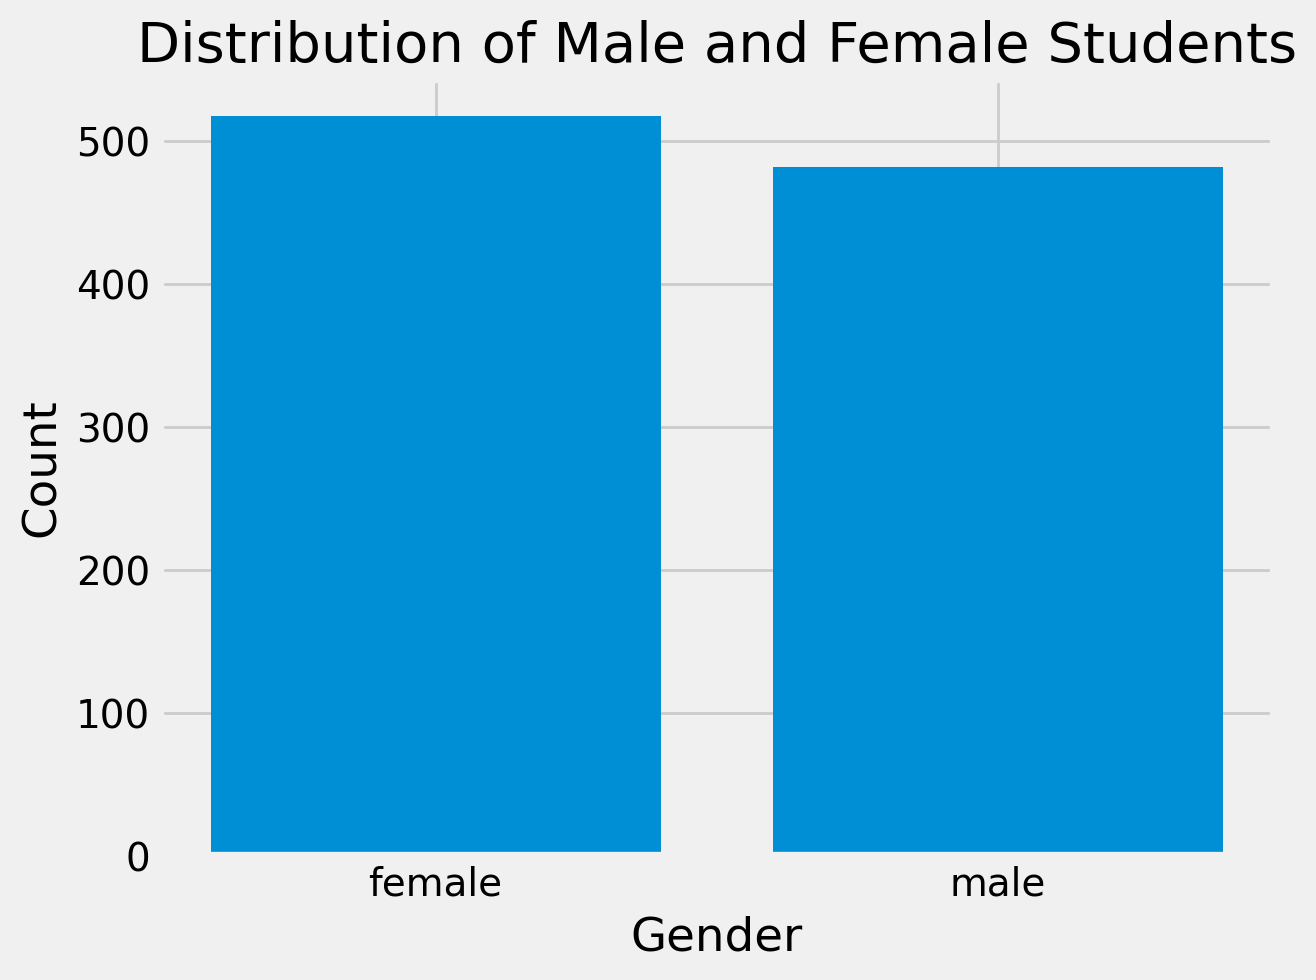

In [13]:
# Count the number of male and female students
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Distribution of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

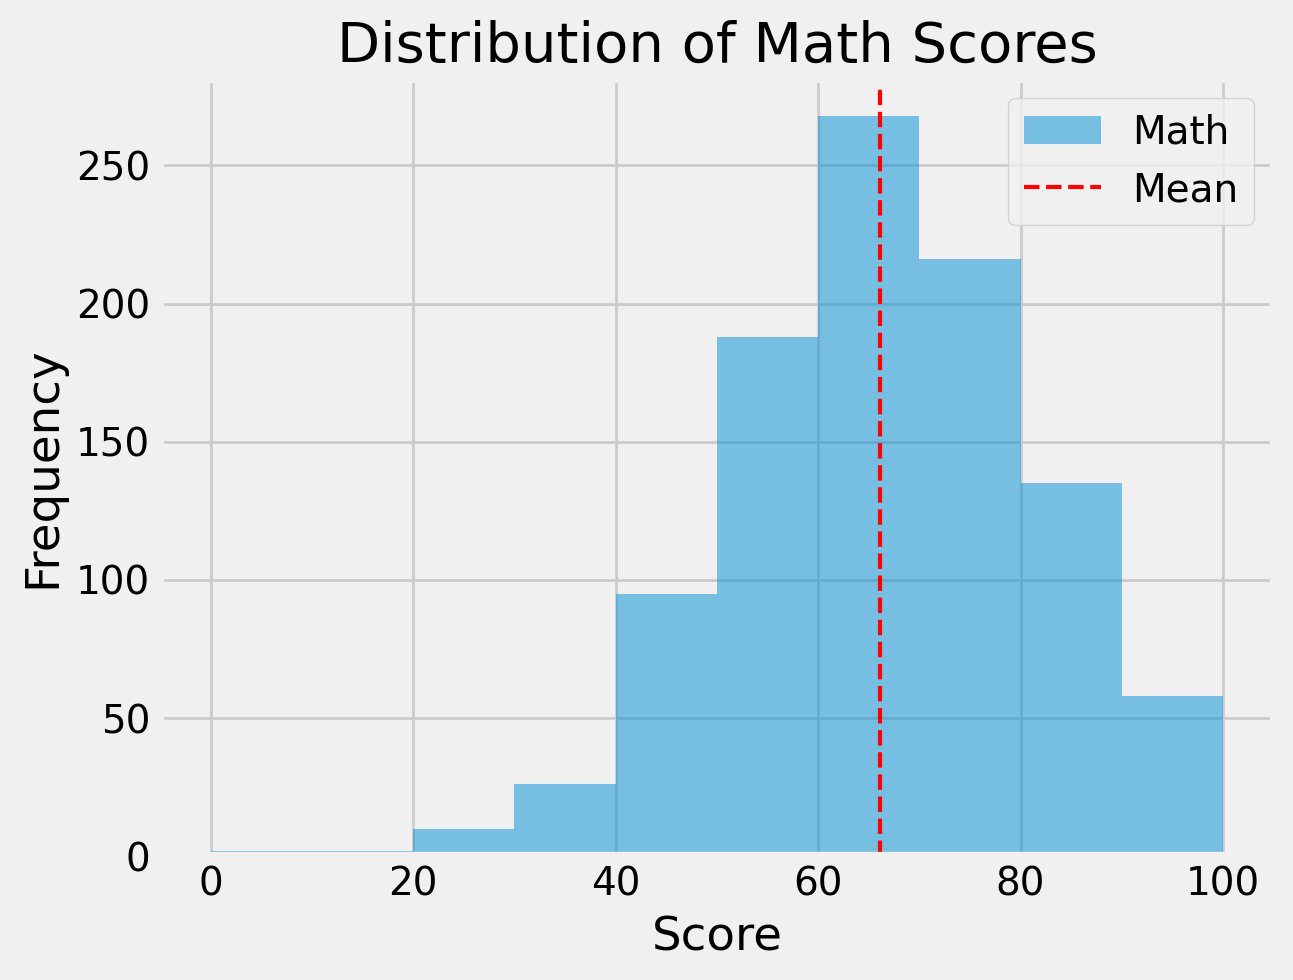

In [14]:
# Create a histogram for math scores
plt.hist(df['math score'], bins=10, alpha=0.5, label='Math')
plt.axvline(df['math score'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.title('Distribution of Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

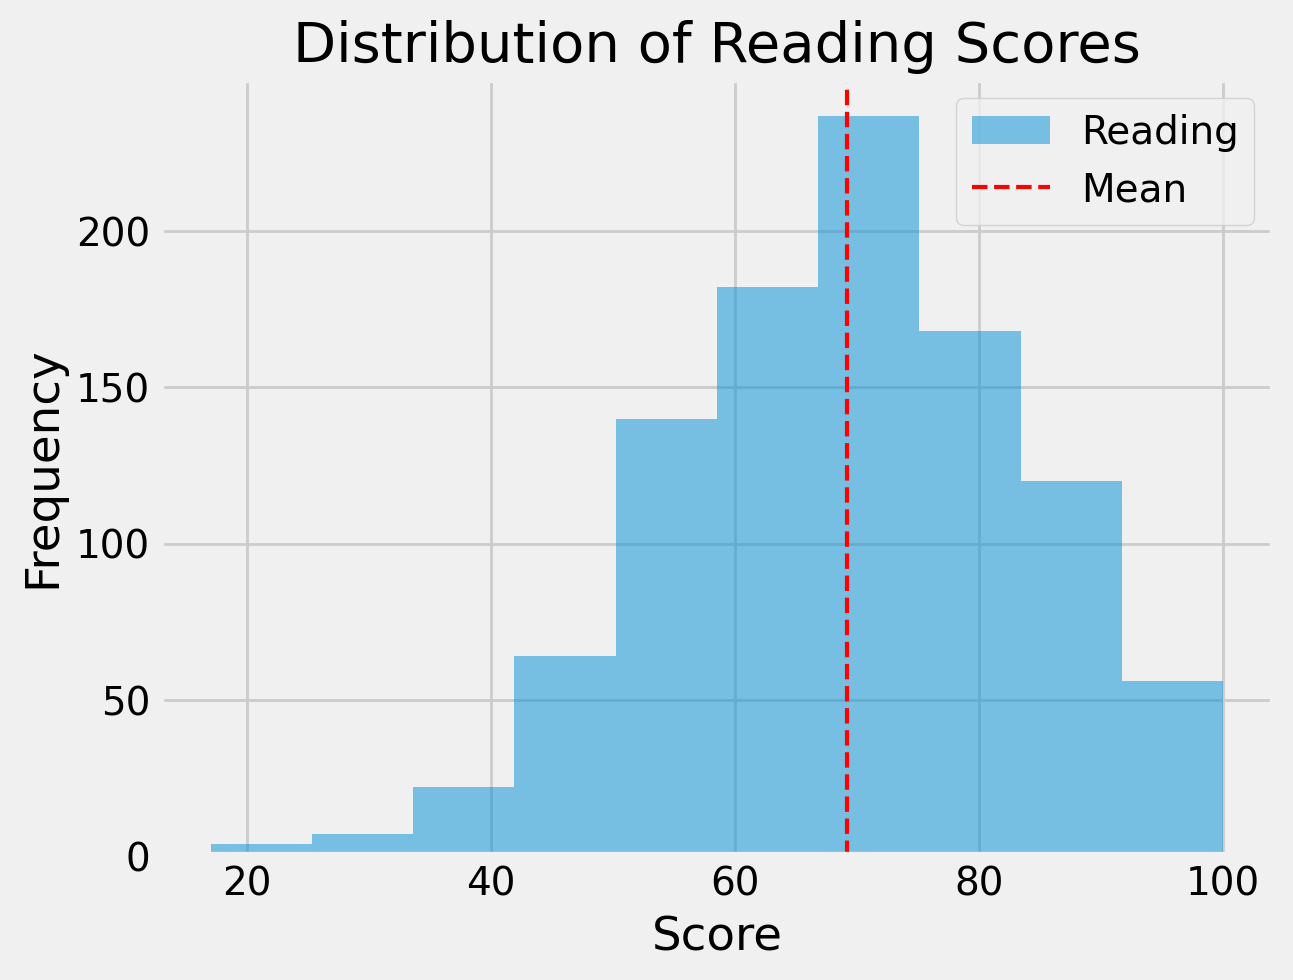

In [15]:
# Create a histogram for reading scores
plt.hist(df['reading score'], bins=10, alpha=0.5, label='Reading')
plt.axvline(df['reading score'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.title('Distribution of Reading Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

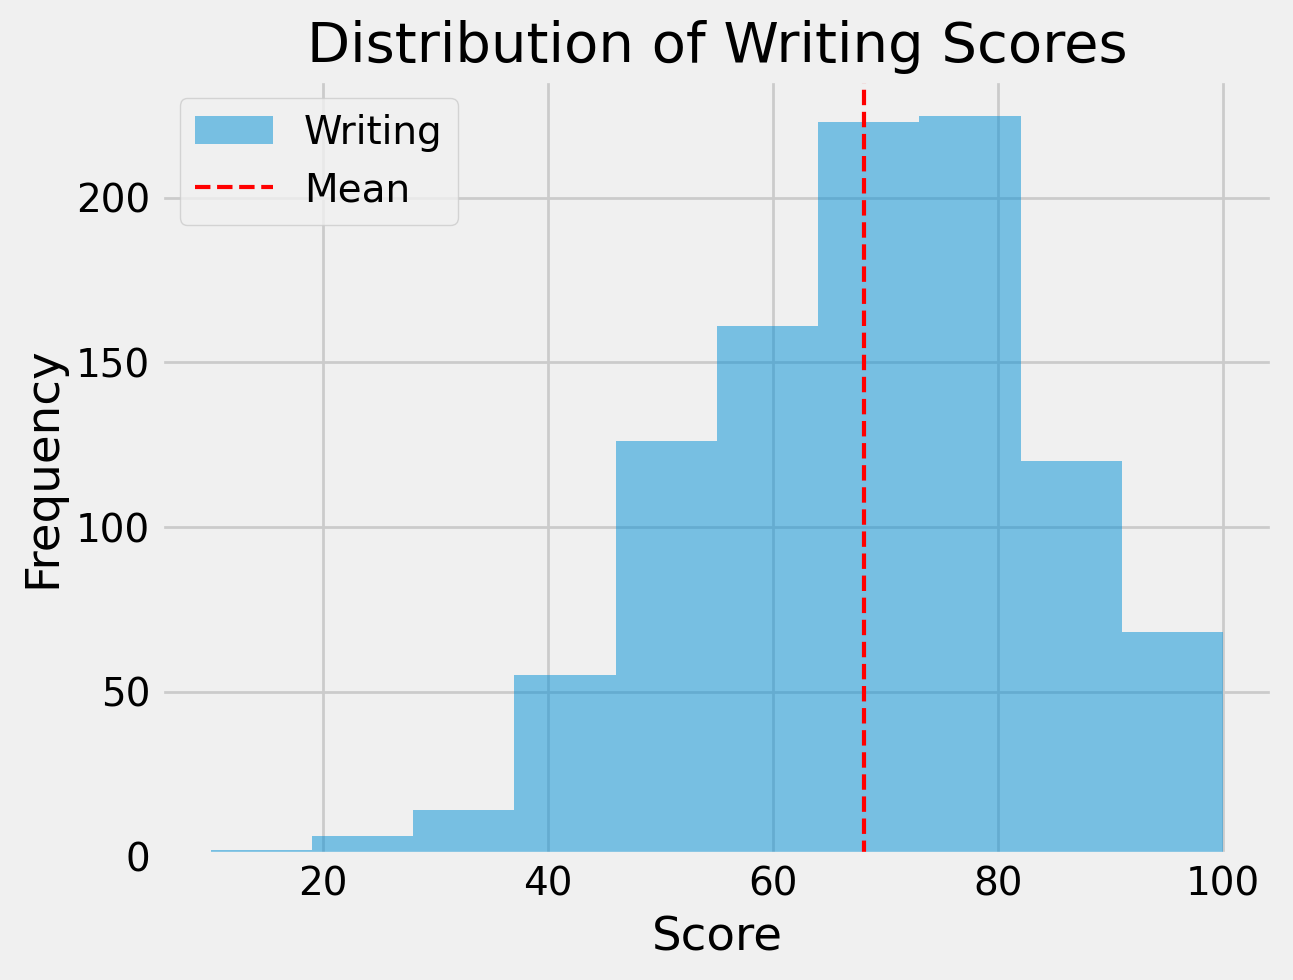

In [16]:
# Create a histogram for writing scores
plt.hist(df['writing score'], bins=10, alpha=0.5, label='Writing')
plt.axvline(df['writing score'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.title('Distribution of Writing Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

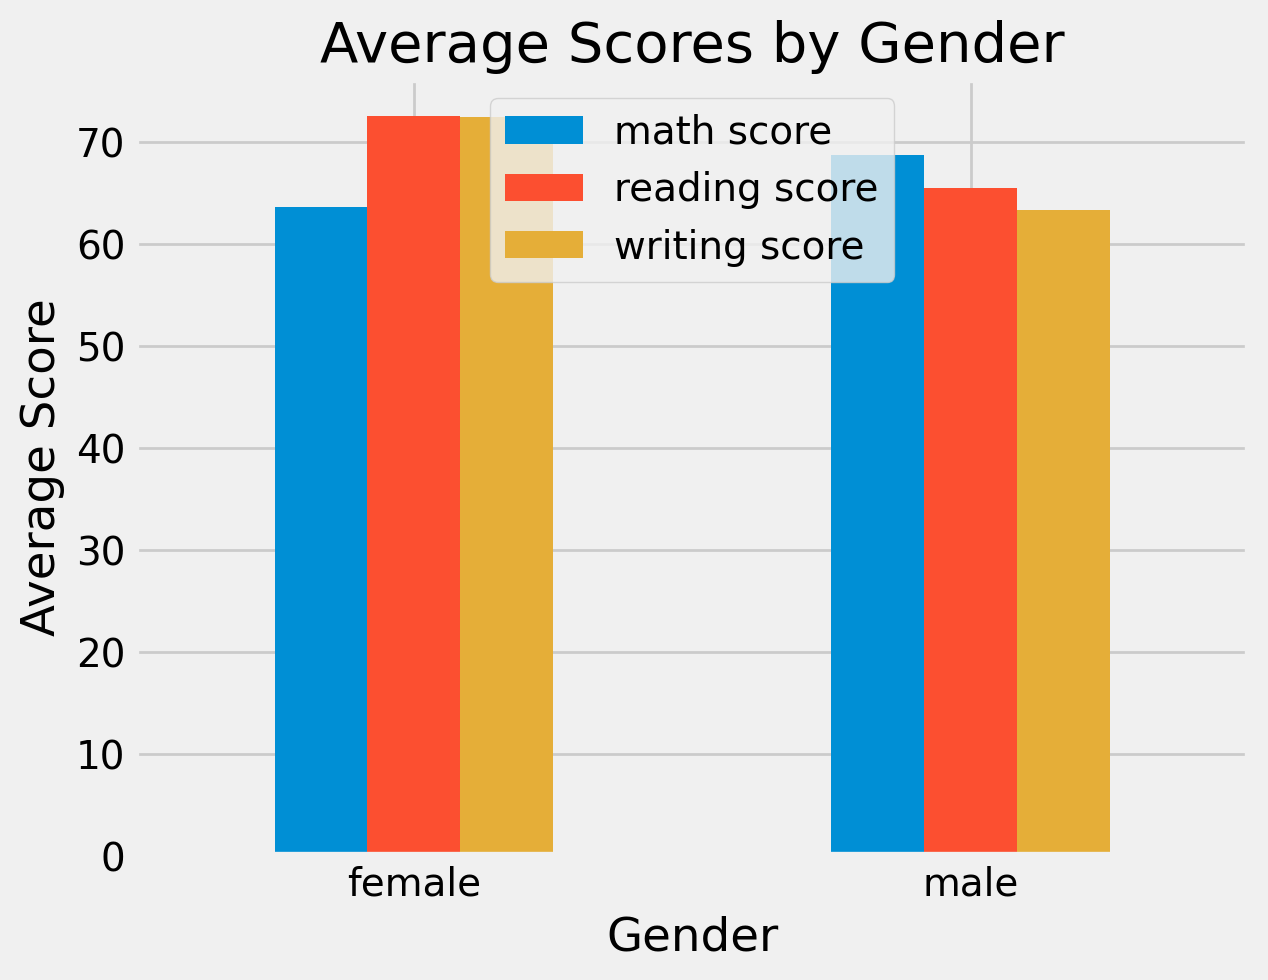

In [17]:
# Calculate average scores by gender
avg_scores_gender = df.groupby('gender')['math score', 'reading score', 'writing score'].mean()

# Create a bar plot
avg_scores_gender.plot(kind='bar')
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

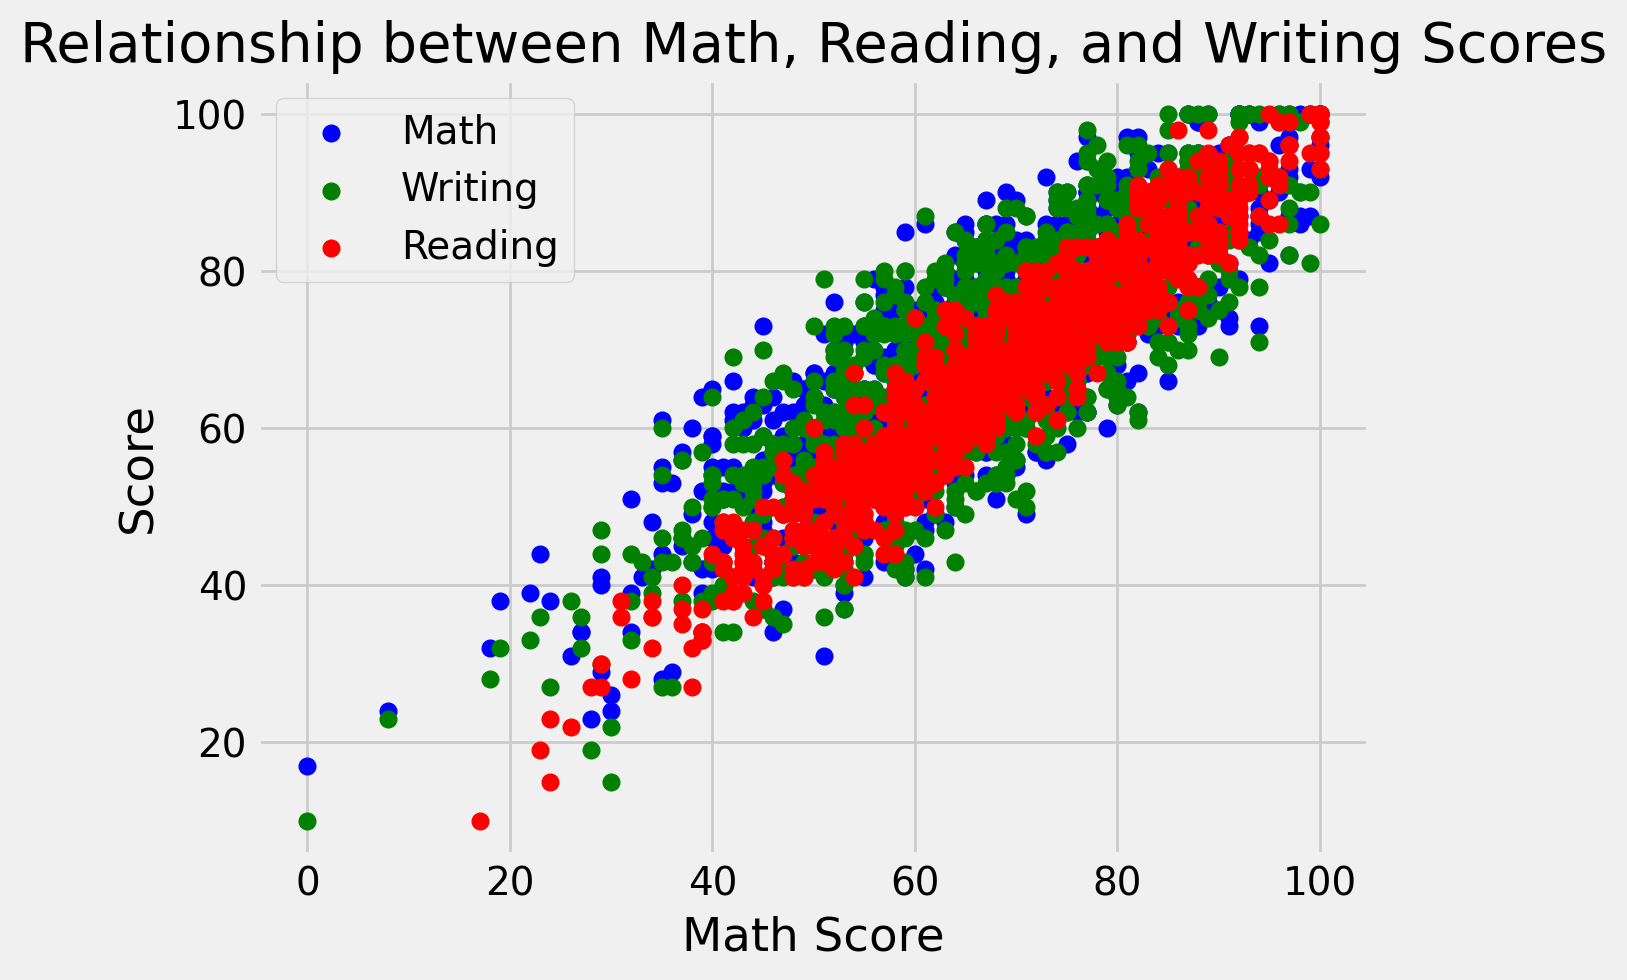

In [18]:
# Create a scatter plot
plt.scatter(df['math score'], df['reading score'], color='blue', label='Math')
plt.scatter(df['math score'], df['writing score'], color='green', label='Writing')
plt.scatter(df['reading score'], df['writing score'], color='red', label='Reading')

plt.title('Relationship between Math, Reading, and Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Score')

plt.legend()
plt.show()

* **Perform Basic Statistical Analysis;** for Task 5

In [19]:
# Calculate mean
mean_math_score = df['math score'].mean()
mean_reading_score = df['reading score'].mean()
mean_writing_score = df['writing score'].mean()

In [20]:
# Calculate median
median_math_score = df['math score'].median()
median_reading_score = df['reading score'].median()
median_writing_score = df['writing score'].median()

In [21]:
# Calculate mode
mode_math_score = stats.mode(df['math score'])
mode_reading_score = stats.mode(df['reading score'])
mode_writing_score = stats.mode(df['writing score'])

In [22]:
# Calculate standard deviation
std_math_score = np.std(df['math score'])
std_reading_score = np.std(df['reading score'])
std_writing_score = np.std(df['writing score'])

# Print the results
print("Standard Deviation Scores:")
print("Math:", std_math_score)
print("Reading:", std_reading_score)
print("Writing:", std_writing_score)

Standard Deviation Scores:
Math: 15.155496659628149
Reading: 14.592890015346516
Writing: 15.188057281956768


In [23]:
# Perform t-test for math scores
math_male = df[df['gender'] == 'male']['math score']
math_female = df[df['gender'] == 'female']['math score']
t_stat_math, p_value_math = stats.ttest_ind(math_male, math_female)

# Perform t-test for reading scores
reading_male = df[df['gender'] == 'male']['reading score']
reading_female = df[df['gender'] == 'female']['reading score']
t_stat_reading, p_value_reading = stats.ttest_ind(reading_male, reading_female)

# Perform t-test for writing scores
writing_male = df[df['gender'] == 'male']['writing score']
writing_female = df[df['gender'] == 'female']['writing score']
t_stat_writing, p_value_writing = stats.ttest_ind(writing_male, writing_female)

**Print the results;**

In [24]:
print("T-test Results:")
print("Math: t-statistic =", t_stat_math, "p-value =", p_value_math)
print("Reading: t-statistic =", t_stat_reading, "p-value =", p_value_reading)
print("Writing: t-statistic =", t_stat_writing, "p-value =", p_value_writing)

T-test Results:
Math: t-statistic = 5.383245869828983 p-value = 9.120185549328822e-08
Reading: t-statistic = -7.959308005187657 p-value = 4.680538743933289e-15
Writing: t-statistic = -9.979557910004507 p-value = 2.019877706867934e-22


* **Documented findings;** for Task 6

Based on the provided analysis, let's summarize the observations, interpretations, and conclusions for each plot and statistical test:

1. Bar Plot - Distribution of Male and Female Students:
* The bar plot shows the distribution of male and female students in the dataset.
* The x-axis represents the gender (male and female), and the y-axis represents the count of students.
* Observation: The bar plot allows us to visually compare the number of male and female students.
* Conclusion: We can observe the relative proportions of male and female students in the dataset.

2. Histograms - Distribution of Scores in Math, Reading, and Writing:

* The histograms show the distribution of scores in math, reading, and writing.
* Each histogram represents the frequency of scores within different score ranges.
* Observations: The histograms provide insights into the spread and shape of the score distributions for each subject.
* Conclusions: We can observe the central tendency, variability, and potential skewness in the score distributions for math, reading, and writing.

3. Bar Plot - Average Scores in Math, Reading, and Writing by Gender:

* The bar plot shows the average scores in math, reading, and writing for each gender.
* Each bar represents the average score for a specific subject and gender.
* Observations: The bar plot enables a comparison of the average scores between male and female students in each subject.
* Conclusions: We can observe if there are any notable differences in the average performance of male and female students across math, reading, and writing.

4. Scatter Plot - Relationship Between Math, Reading, and Writing Scores:

* The scatter plot shows the relationship between math, reading, and writing scores.
* Each point represents a student's scores in two subjects (e.g., math and reading, math and writing, reading and writing).
* Observations: The scatter plot allows us to examine the patterns and correlations between different subjects' scores.
* Conclusions: We can identify any positive, negative, or no correlations between the scores in math, reading, and writing.

5. T-Test - Comparison of Male and Female Students' Performance:

* The t-tests are performed to determine if there is a significant difference between male and female students' performance in math, reading, and writing.
* The t-statistic and p-value are calculated for each subject.
* Observations: The t-statistic measures the difference in means, and the p-value indicates the significance of that difference.
* Conclusions: Based on the t-tests' results, we can determine if there are statistically significant differences between male and female students' performance in each subject.

*In conclusion,* the analysis provides insights into the distribution of male and female students, the scores' distributions, the average scores by gender, the relationships between different subjects' scores, and the significant differences between male and female students' performance. These observations and conclusions can help in understanding the dataset and drawing inferences about the students' performance based on gender and subjects.